In [1]:
import numpy as np
import scipy.stats as ss
import statsmodels.api as sm
import matplotlib.pyplot as plt

- Supervised learning refers to a collection of techniques and algorithms that, when given a set of example inputs and example outputs, learn to associate the inputs with the outputs.The outputs usually need to be provided by a supervisor, which could be a human or another algorithm, and this is where the name comes from.
- Unsupervised learning refers to a collection of techniques and algorithms that are given inputs only and there are no outputs. The goal of supervised learning is to learn relationships and structure from such data.
- Regression refers to problems that have continuous outputs.
- Quantitative variables take on numerical values, such as income, whereas qualitative variables take on values in a given category, such as male or female.
- If the outcome is quantitative, we talk about regression problems, whereas if the outcome is qualitative, we talk about classification problems.
- Loss function, which is a way of quantifying how far our predictions for Y for a given value of X are from the true observed values of Y.

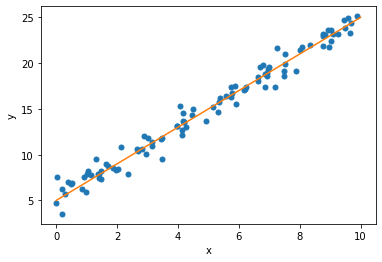

In [2]:
n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale=1, size=n)

plt.figure()
plt.plot(x, y, "o", ms=5)
xx = np.array([0, 10])
plt.plot(xx, beta_0 + beta_1 * xx)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [3]:
def compute_rss(y_estimate, y):
    return sum(np.power(y-y_estimate, 2))
def estimate_y(x, b_0, b_1):
    return b_0 + b_1 * x
rss = compute_rss(estimate_y(x, beta_0, beta_1), y)

In [4]:
rss = []
slopes = np.arange(-10, 15, 0.001)
for slope in slopes:
    rss.append(np.sum((y - beta_0 - slope * x) ** 2))

In [5]:
# Statsmodels
# to estimate f(x) with constant missing => going through (0/0)
mod = sm.OLS(y, x)
est = mod.fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2974.
Date:                Fri, 31 Jan 2020   Prob (F-statistic):                    1.14e-75
Time:                        09:37:10   Log-Likelihood:                         -246.89
No. Observations:                 100   AIC:                                      495.8
Df Residuals:                      99   BIC:                                      498.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [6]:
# Fit model including a constant
X = sm.add_constant(x)
mod = sm.OLS(y, X)
est = mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           7.47e-82
Time:                        09:37:10   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0